In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pickle

In [2]:
os.chdir(r"E:\Data Science Project\NWS Complaint Management System")

In [3]:
os.getcwd()

'E:\\Data Science Project\\NWS Complaint Management System'

In [4]:
data = pd.read_excel("Complaint Data.xlsx")

In [5]:
data.shape

(4095, 28)

In [6]:
data.head()

,Complaint No,Date & time,Customer Name,Address,MR CODE,Area,Colony Name,Zone,KNO,Mobile No,...,CREATED_BY,Tanker Details,Attending date and time,Closure Date,With in Time Frame,Time Frame,NO Of Days,Updated_Remarks,Redressal,alternate mobile number
0,COM192539,2020-11-30 20:45:18,SH ONKAR SINGH AND S,"H.NO- 10 (G.F.), BLOCK- A EXTN. DK ROAD. UTTAM...",332,26,"A-BLOCK, A-EXTN, SHYAM PARK",MOHAN GARDEN,8360196605,9871236868,...,KAMAL KUMAR,NaN,2020-12-01 06:00:00,2020-12-03 12:56:43,Yes,1 Days,0 Day 9 Hours,Team visited the site and found consumer is ge...,Signed,9871236868
1,COM192538,2020-11-30 20:07:17,HS SACHDEVA PROPERTIES AND BUILDERS PVT LTD,": 124 AND 125 BLOCK-S(CUID-2691), TOP FLOOR (0...",332,65,S BLOCK,MOHAN GARDEN,7980084564,8851237848,...,KAMAL KUMAR,NaN,NaT,NaN,NaN,7 Days,NaN,NaN,NaN,8851237848
2,COM192537,2020-11-30 20:07:02,H S SACHDEVA PROPERTIES AND BUILDERS PVT LTD,HNO- 124 & 125 { TF FLAT NO-07 } S-BLOCK MOHAN...,332,65,BLOCK-S,MOHAN GARDEN,4162735364,9811368493,...,Munna Thakur,NaN,NaT,NaN,NaN,7 Days,NaN,NaN,NaN,9811368493
3,COM192536,2020-11-30 19:52:37,PREM KUMAR SINGH,"H ,NO - 3 GANDHI CHOWK VIKAS PURI GALI NO - 4 ...",332,71,SAINIC ENCLAVE SEC-2,MOHAN GARDEN,3182222315,9971911226,...,Munna Thakur,NaN,NaT,NaN,NaN,7 Days,NaN,NaN,NaN,9971911226
4,COM192535,2020-11-30 19:09:01,JAGBIR SINGH,DHASA ROAD MITRAU EXTN. BACK PETROL PUMP GALI ...,527,3,MITRAON EXTN.,NAJAFGARH,NaN,9911298730,...,KAMAL KUMAR,NaN,2020-12-01 10:00:00,2020-12-01 11:30:00,Yes,1 Days,0 Day 14 Hours,"leakage from hsc, same was repaired",Signed,9911298730


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 28 columns):
Complaint No               4095 non-null object
Date & time                4095 non-null datetime64[ns]
Customer Name              4094 non-null object
Address                    4095 non-null object
MR CODE                    4095 non-null object
Area                       4095 non-null object
Colony Name                4095 non-null object
Zone                       4095 non-null object
KNO                        3821 non-null object
Mobile No                  4095 non-null object
Complaint Nature           4095 non-null object
Complaint Type             4095 non-null object
Problem_Since              4095 non-null datetime64[ns]
Source                     4095 non-null object
Grievance No               466 non-null float64
Status                     4095 non-null object
AssignTo                   4015 non-null object
Problem                    4095 non-null object
CREATED_BY   

In [8]:
column = ['Complaint Type', 'Problem']

In [9]:
data = data[column]

In [10]:
data

,Complaint Type,Problem
0,No Water Supply,NO WATER...
1,Meter Related,METER DEFECTIVE....
2,Meter Related,METER REVERSE
3,Water Connection Related,"Dear Sir, My Water Connection with KNO no 3182..."
4,LEAKAGE,WASTAGE OF WATER SUPPLY...
...,...,...
4090,Tanker Related,TANKER REQUESTS
4091,LEAKAGE,Leakages of Water Pipe Line
4092,Tanker Related,tanker
4093,Tanker Related,tanker


In [11]:
data.isnull().sum()

Complaint Type    0
Problem           0
dtype: int64

In [12]:
data['Category_id'] = data["Complaint Type"].factorize()[0] 

In [13]:
cat_id_data = data[['Complaint Type', 'Category_id']].drop_duplicates().sort_values('Category_id')

In [14]:
cat_id_data

,Complaint Type,Category_id
0,No Water Supply,0
1,Meter Related,1
3,Water Connection Related,2
4,LEAKAGE,3
6,Low Pressure,4
11,Tanker Related,5
14,Contamination,6
30,Billing Related,7
185,Illegal Connection,8
227,Pits on Road,9


In [15]:
cat_to_id = dict(cat_id_data.values)

In [16]:
cat_to_id

{'No Water Supply': 0,
 'Meter Related': 1,
 'Water Connection Related': 2,
 'LEAKAGE': 3,
 'Low Pressure': 4,
 'Tanker Related': 5,
 'Contamination': 6,
 'Billing Related': 7,
 'Illegal Connection': 8,
 'Pits on Road': 9,
 'Pipeline Related': 10,
 'Capex': 11}

In [17]:
id_to_cat = dict(cat_id_data[["Category_id", "Complaint Type"]].values)

In [18]:
id_to_cat

{0: 'No Water Supply',
 1: 'Meter Related',
 2: 'Water Connection Related',
 3: 'LEAKAGE',
 4: 'Low Pressure',
 5: 'Tanker Related',
 6: 'Contamination',
 7: 'Billing Related',
 8: 'Illegal Connection',
 9: 'Pits on Road',
 10: 'Pipeline Related',
 11: 'Capex'}

In [19]:
data.head()

,Complaint Type,Problem,Category_id
0,No Water Supply,NO WATER...,0
1,Meter Related,METER DEFECTIVE....,1
2,Meter Related,METER REVERSE,1
3,Water Connection Related,"Dear Sir, My Water Connection with KNO no 3182...",2
4,LEAKAGE,WASTAGE OF WATER SUPPLY...,3


In [20]:
fig = plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

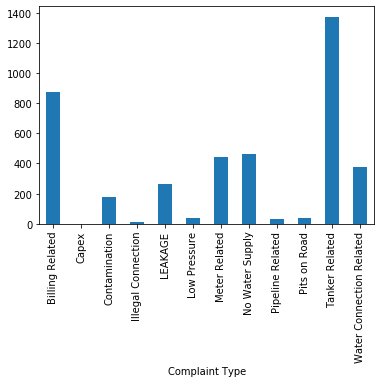

In [21]:
data.groupby('Complaint Type').Problem.count().plot.bar(ylim=0)

In [22]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                       min_df = 5,
                       norm = 'l2',
                       ngram_range = (1,2),
                       stop_words = 'english')

In [23]:
Problem_tfidf = tfidf.fit_transform(data.Problem).toarray()

In [24]:
Problem_tfidf.shape

(4095, 527)

In [25]:
Problem_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
Vector = 'transform.pkl'
pickle.dump(tfidf, open(Vector, 'wb'))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(Problem_tfidf, data['Complaint Type'], random_state=0)

In [28]:
clf = LinearSVC().fit(X_train, y_train)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn import metrics

In [31]:
print(metrics.classification_report(y_test,y_pred, labels = data['Complaint Type'], target_names = data['Complaint Type']))

                          precision    recall  f1-score   support

         No Water Supply       0.91      0.97      0.94       116
           Meter Related       0.98      0.96      0.97       102
           Meter Related       0.98      0.96      0.97       102
Water Connection Related       0.93      0.98      0.95        85
                 LEAKAGE       1.00      0.96      0.98        54
           Meter Related       0.98      0.96      0.97       102
            Low Pressure       1.00      0.80      0.89        10
           Meter Related       0.98      0.96      0.97       102
         No Water Supply       0.91      0.97      0.94       116
         No Water Supply       0.91      0.97      0.94       116
         No Water Supply       0.91      0.97      0.94       116
          Tanker Related       0.99      0.99      0.99       360
         No Water Supply       0.91      0.97      0.94       116
          Tanker Related       0.99      0.99      0.99       360
         

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [32]:
score = metrics.accuracy_score(y_test, y_pred)

In [33]:
score

0.9677734375

In [34]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))